<a href="https://colab.research.google.com/github/Gayathri280278/stock-prediction/blob/main/my_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
from datetime import datetime
end=datetime.now()
start = datetime(end.year-5,end.month,end.day)

In [ ]:
stock ="GOOG"
df = yf.download(stock,start,end,multi_level_index=False,auto_adjust=False)


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-02-04,102.350838,103.118500,103.927498,102.129501,103.444504,37046000
2021-02-05,104.119095,104.900002,105.125504,102.966499,103.500000,30702000
2021-02-08,103.866478,104.645500,106.177353,103.599998,105.295502,24838000
2021-02-09,103.399971,104.175499,105.256500,103.927002,103.927002,17798000
2021-02-10,103.989059,104.768997,105.418503,103.154503,104.710503,22710000


In [ ]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2026-01-28,336.279999,336.279999,337.630005,332.130005,336.609985,17538500
2026-01-29,338.660004,338.660004,342.290009,326.720001,340.350006,24548300
2026-01-30,338.529999,338.529999,340.290009,332.640015,334.459991,21740200
2026-02-02,344.899994,344.899994,345.165009,336.010010,336.549988,22775200
2026-02-03,340.700012,340.700012,350.149994,338.589996,348.515015,25713100


In [ ]:
df.shape

(1255, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2021-02-04 to 2026-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1255 non-null   float64
 1   Close      1255 non-null   float64
 2   High       1255 non-null   float64
 3   Low        1255 non-null   float64
 4   Open       1255 non-null   float64
 5   Volume     1255 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.6 KB


In [ ]:
df.isnull().sum() #missing values

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.duplicated().sum() #duplicate values

np.int64(0)

In [ ]:
for i in df.select_dtypes(include=['object']): # garbage value
 print(df[i].value_counts())

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,1255.0,1.508912e+02,5.123161e+01,8.286848e+01,1.168985e+02,1.381638e+02,1.694040e+02,3.449000e+02
Close,1255.0,1.516952e+02,5.105137e+01,8.349000e+01,1.177752e+02,1.392000e+02,1.699950e+02,3.449000e+02
High,1255.0,1.533639e+02,5.161072e+01,8.655000e+01,1.190165e+02,1.406400e+02,1.716775e+02,3.501500e+02
Low,1255.0,1.499705e+02,5.042833e+01,8.345000e+01,1.165042e+02,1.380100e+02,1.681500e+02,3.385900e+02
Open,1255.0,1.515985e+02,5.105452e+01,8.551000e+01,1.173797e+02,1.394100e+02,1.701400e+02,3.485150e+02
Volume,1255.0,2.425749e+07,1.014885e+07,6.138200e+06,1.765495e+07,2.186420e+07,2.801985e+07,9.779860e+07


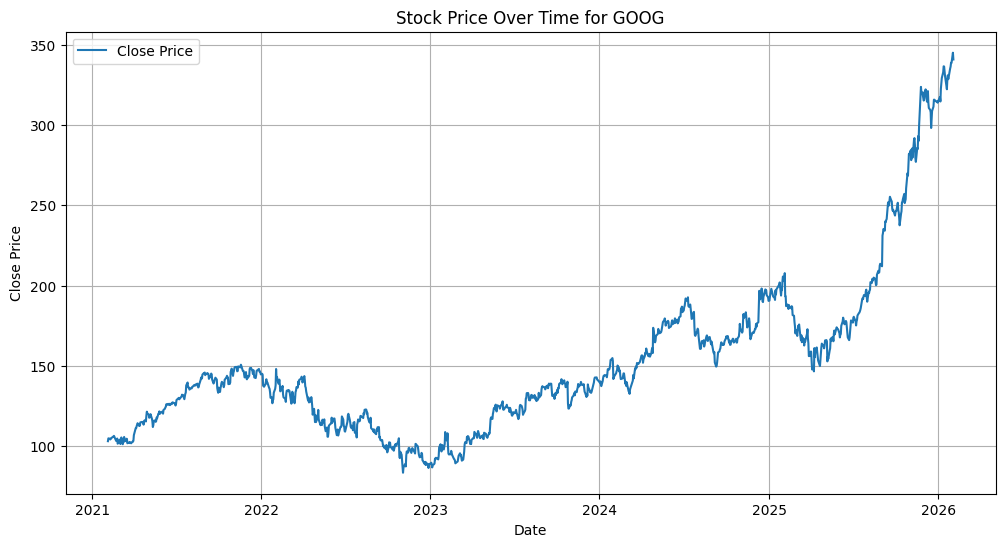

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time for ' + stock)
plt.legend()
plt.grid(True)
plt.show()

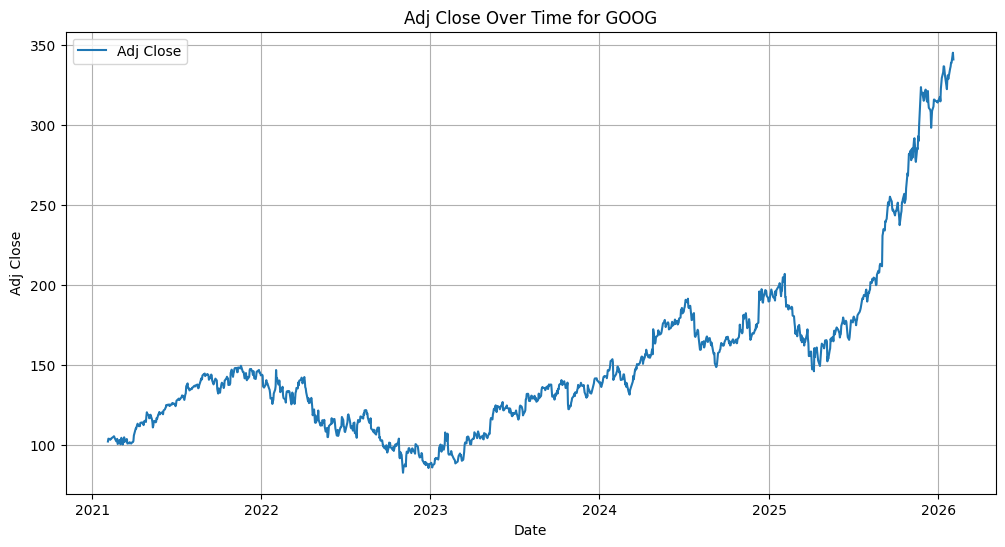

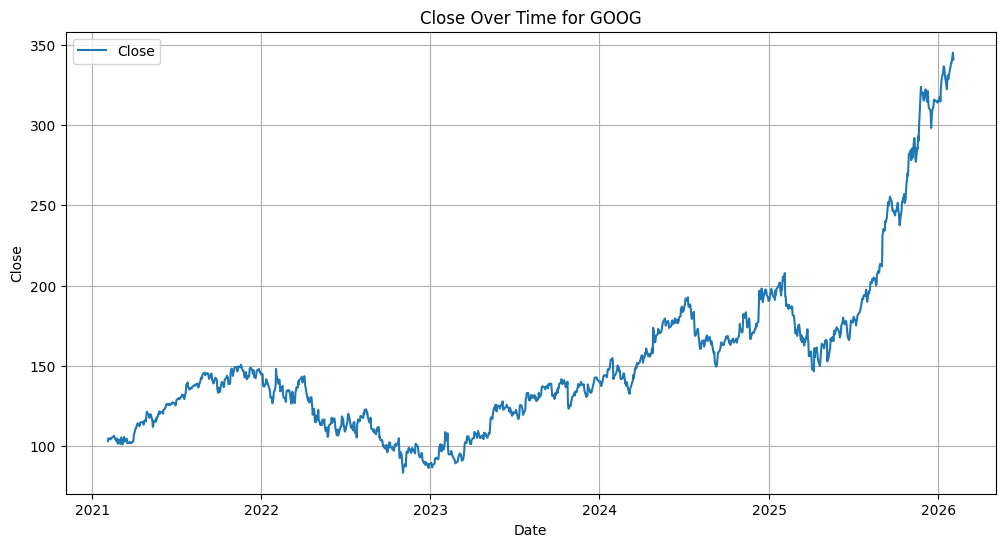

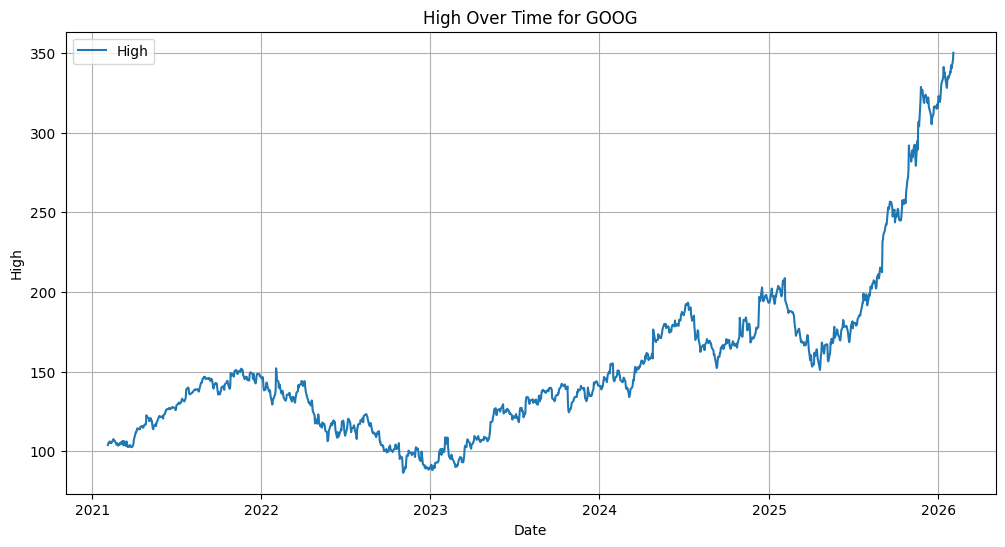

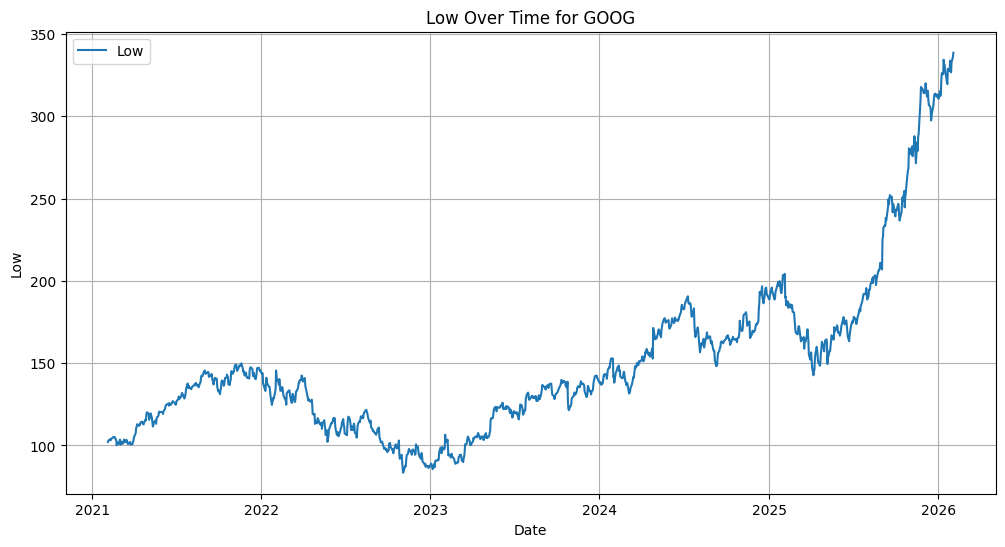

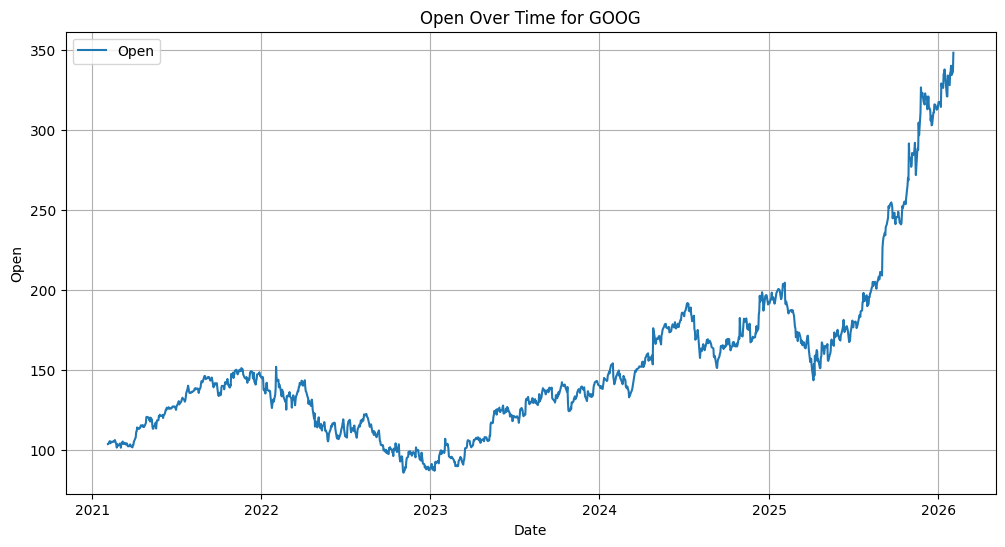

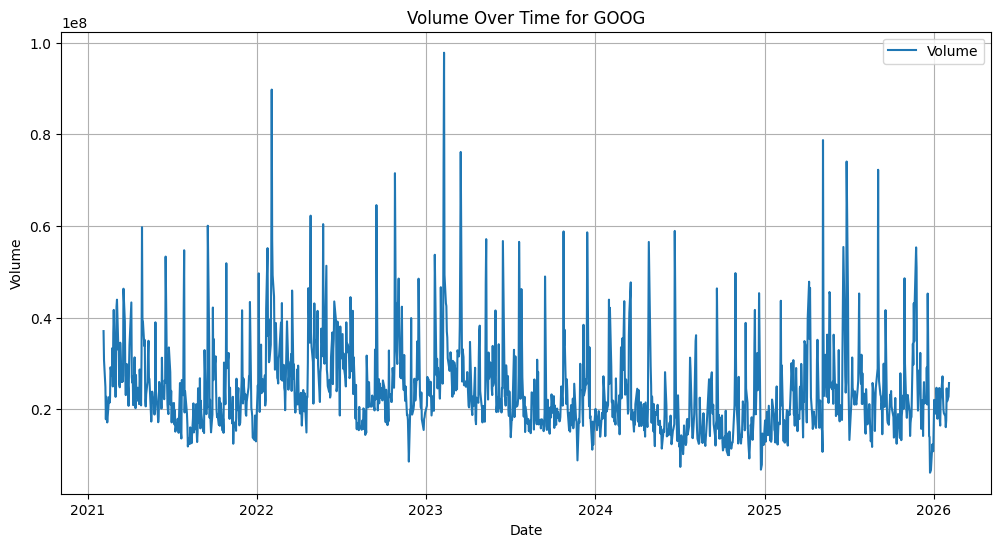

In [ ]:
import matplotlib.pyplot as plt   #line plot is drawn between date and various prices to understand the trend

# Get numerical columns, excluding the 'Date' index itself
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col], label=col)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(f'{col} Over Time for {stock}')
    plt.legend()
    plt.grid(True)
    plt.show()

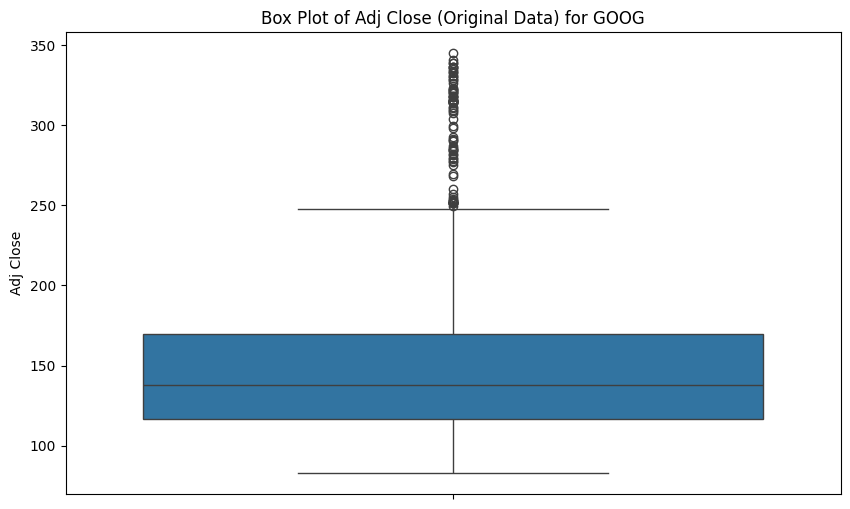

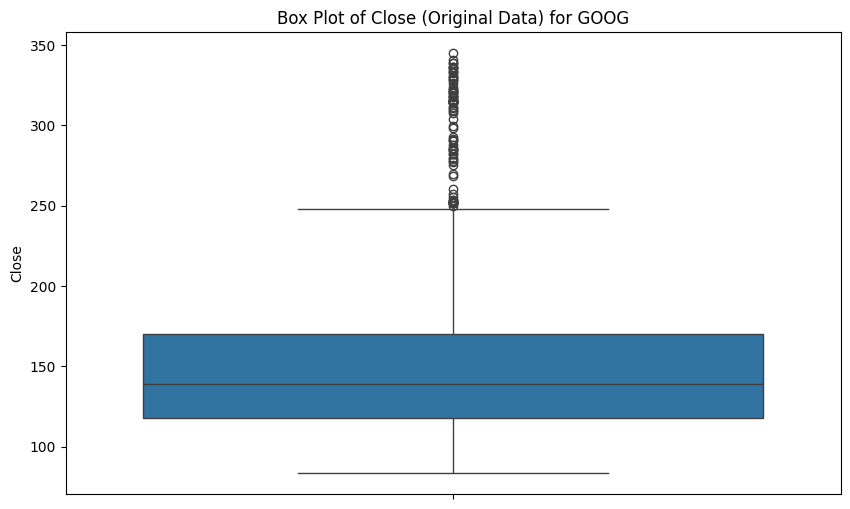

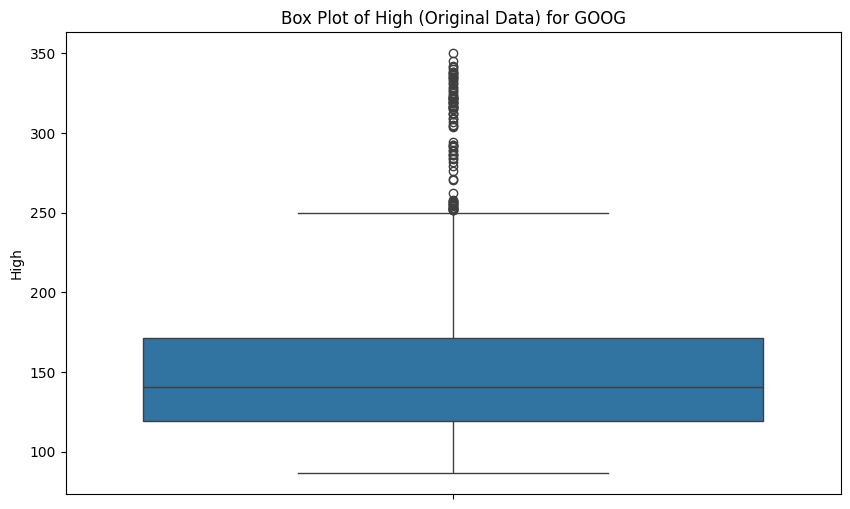

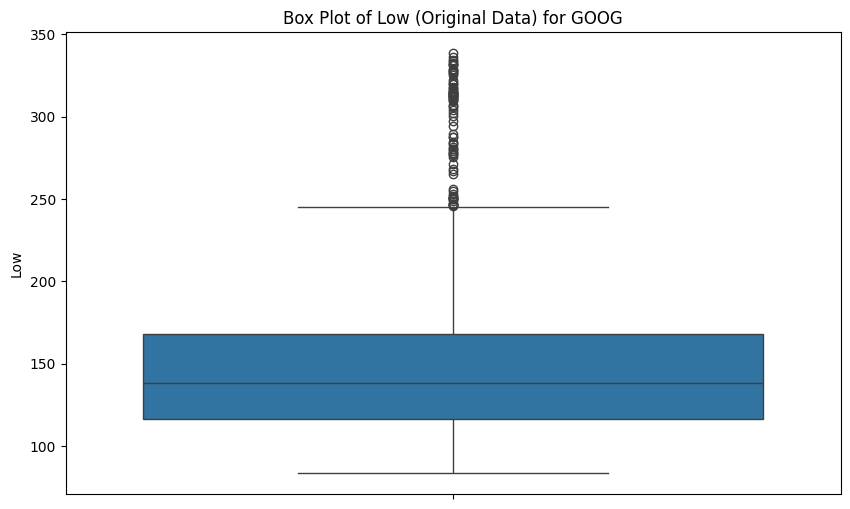

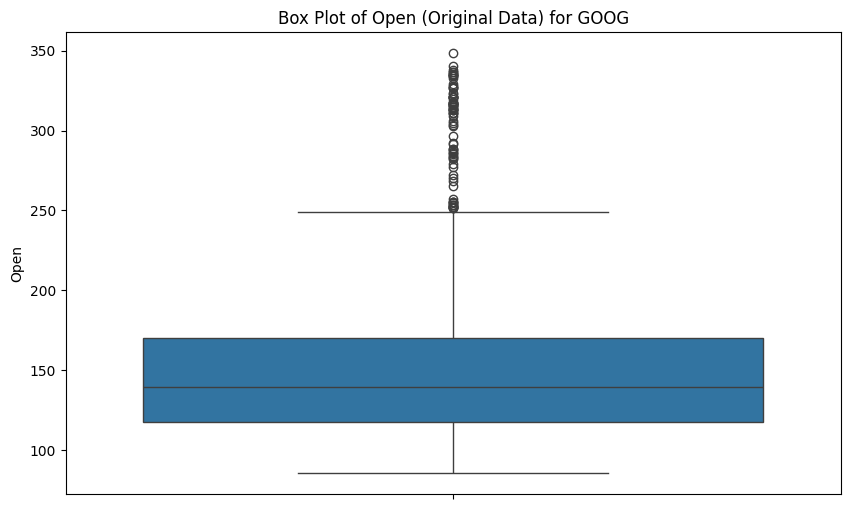

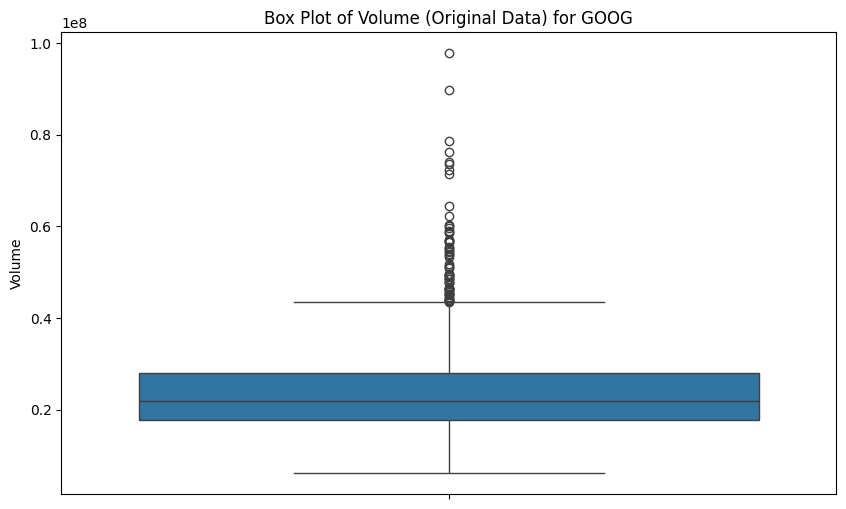

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns from the original DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (Original Data) for {stock}')
    plt.ylabel(col)
    plt.show()

In [ ]:
import numpy as np

# Create a copy of the original DataFrame to treat outliers
df_treated = df.copy()

# Get numerical columns
numerical_cols = df_treated.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = df_treated[col].quantile(0.25)
    Q3 = df_treated[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_treated[col] = np.where(df_treated[col] < lower_bound, lower_bound, df_treated[col])
    df_treated[col] = np.where(df_treated[col] > upper_bound, upper_bound, df_treated[col])

print("DataFrame after outlier treatment (capping):")
print(df_treated.head())

DataFrame after outlier treatment (capping):
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2021-02-04  102.350838  103.118500  103.927498  102.129501  103.444504   
2021-02-05  104.119095  104.900002  105.125504  102.966499  103.500000   
2021-02-08  103.866478  104.645500  106.177353  103.599998  105.295502   
2021-02-09  103.399971  104.175499  105.256500  103.927002  103.927002   
2021-02-10  103.989059  104.768997  105.418503  103.154503  104.710503   

                Volume  
Date                    
2021-02-04  37046000.0  
2021-02-05  30702000.0  
2021-02-08  24838000.0  
2021-02-09  17798000.0  
2021-02-10  22710000.0  


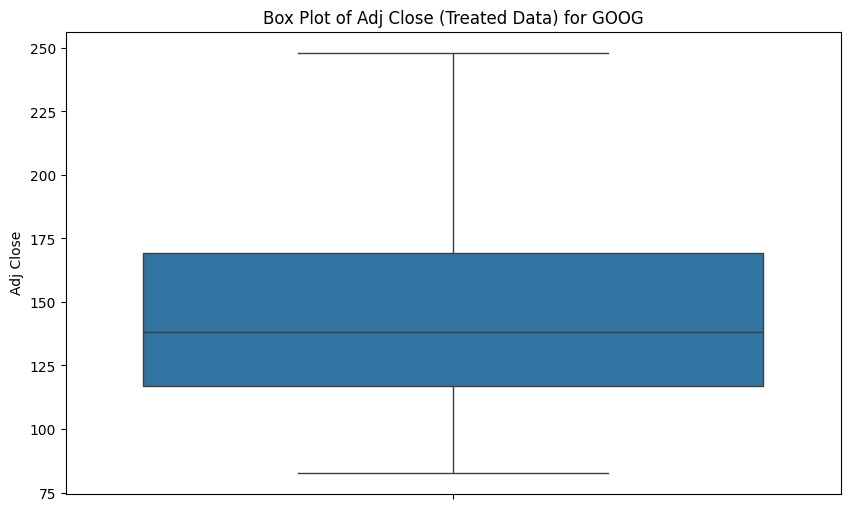

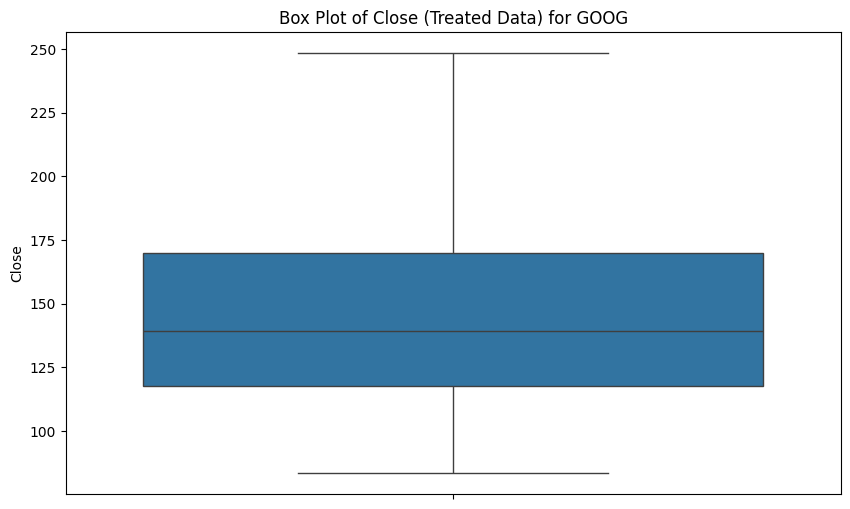

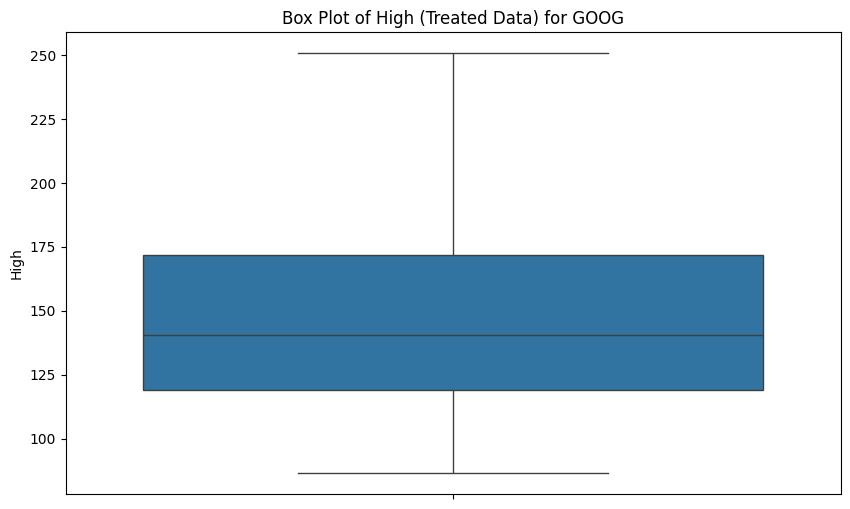

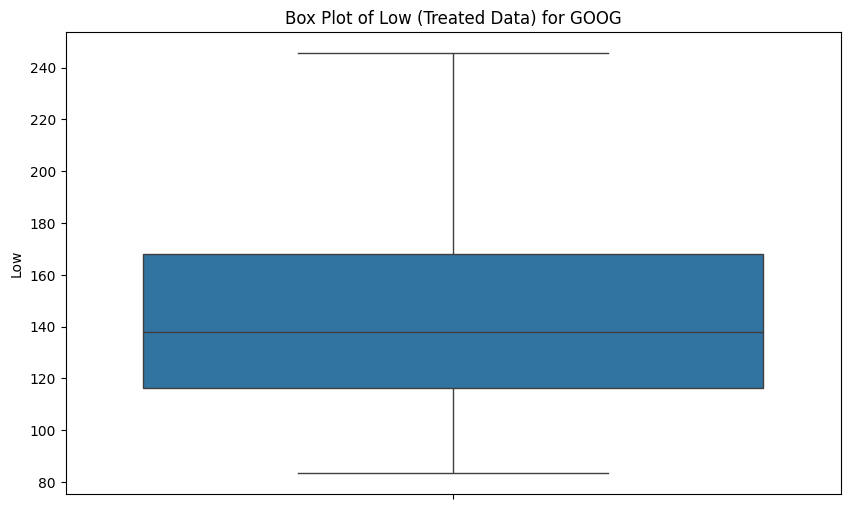

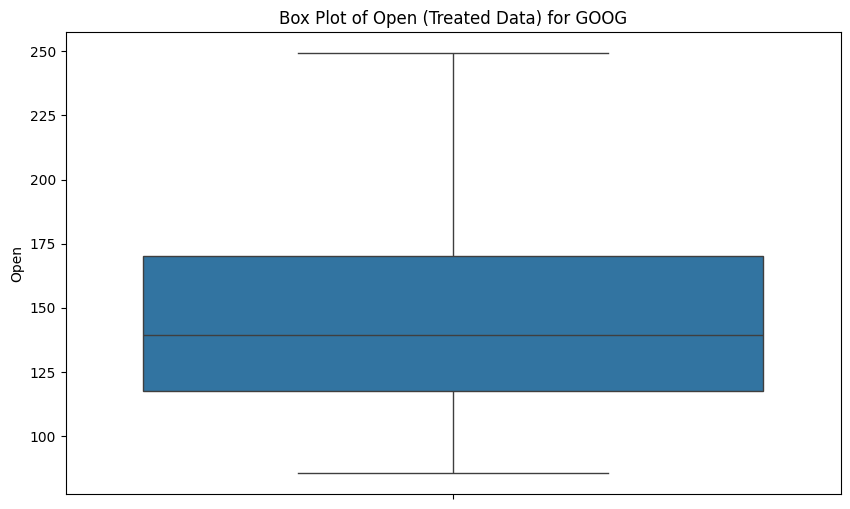

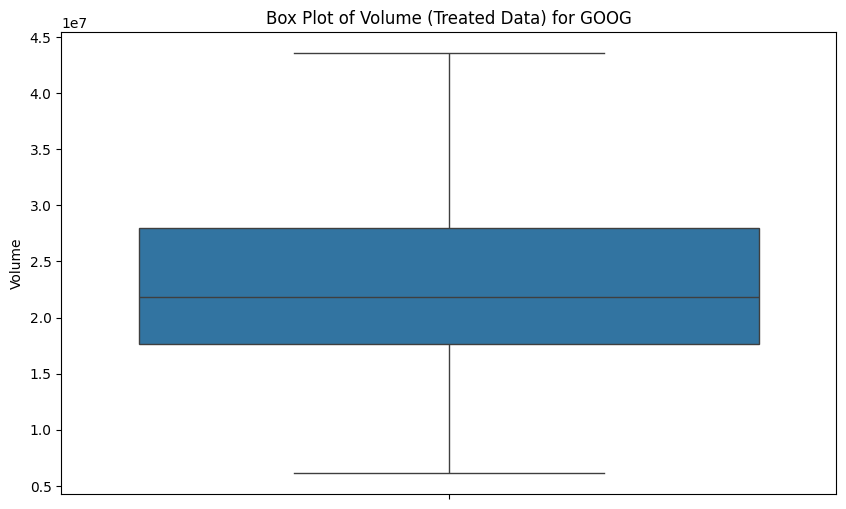

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns from the treated DataFrame
numerical_cols = df_treated.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_treated[col])
    plt.title(f'Box Plot of {col} (Treated Data) for {stock}')
    plt.ylabel(col)
    plt.show()

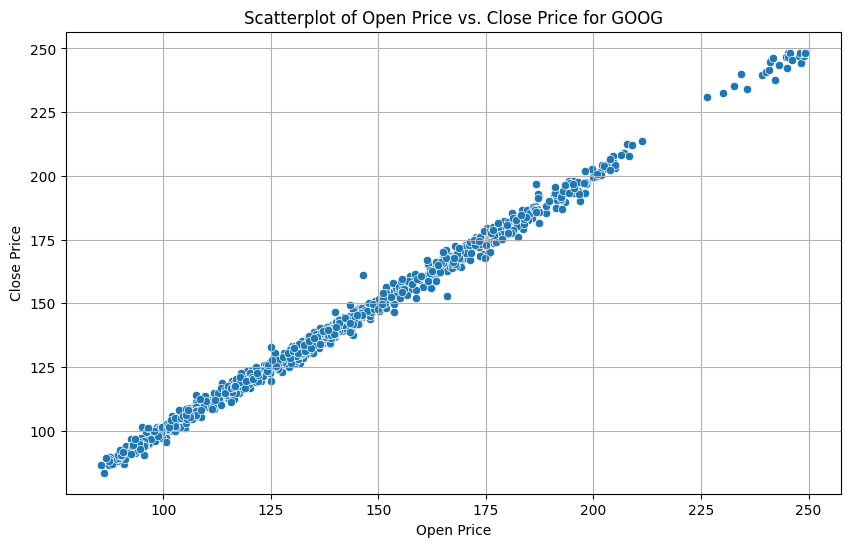

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_treated['Open'], y=df_treated['Close'])
plt.title(f'Scatterplot of Open Price vs. Close Price for {stock}')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

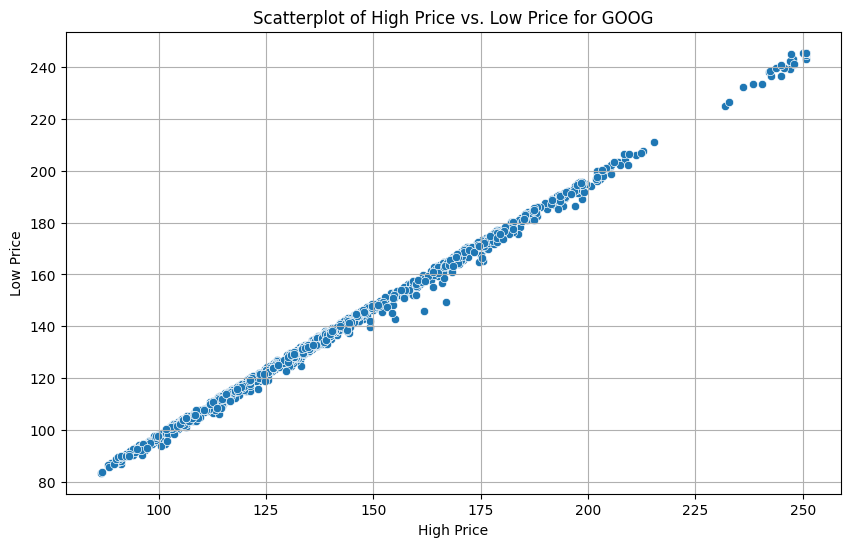

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatterplot of High Price vs. Low Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_treated['High'], y=df_treated['Low'])
plt.title(f'Scatterplot of High Price vs. Low Price for {stock}')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()

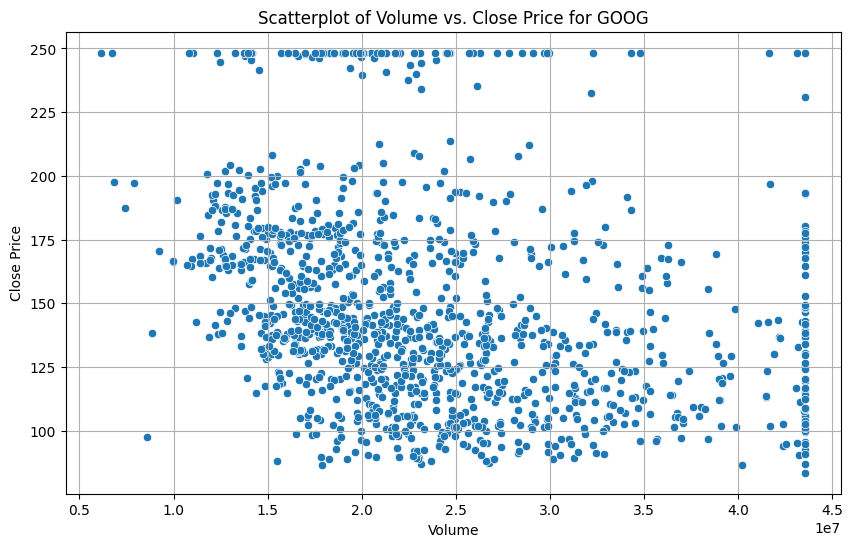

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Scatterplot of Volume vs. Close Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_treated['Volume'], y=df_treated['Close'])
plt.title(f'Scatterplot of Volume vs. Close Price for {stock}')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

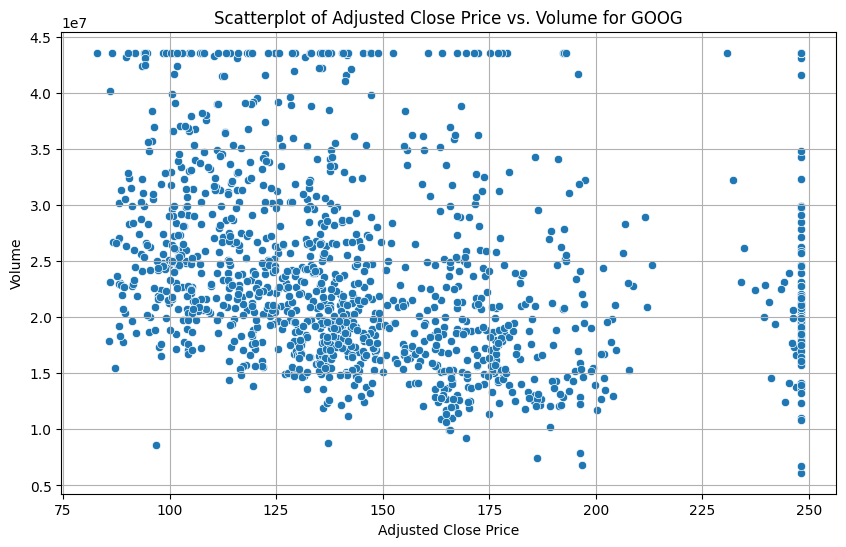

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Scatterplot of Adj Close vs. Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_treated['Adj Close'], y=df_treated['Volume'])
plt.title(f'Scatterplot of Adjusted Close Price vs. Volume for {stock}')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

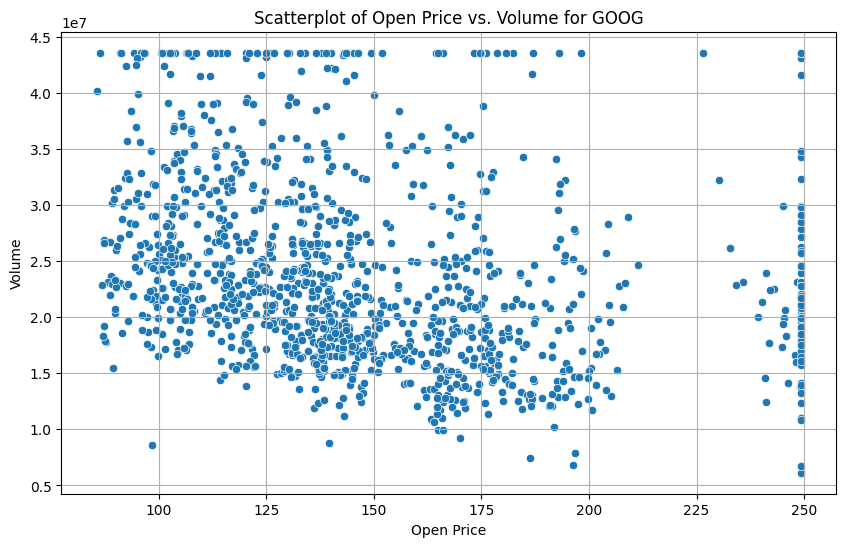

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Scatterplot of Open Price vs. Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_treated['Open'], y=df_treated['Volume'])
plt.title(f'Scatterplot of Open Price vs. Volume for {stock}')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

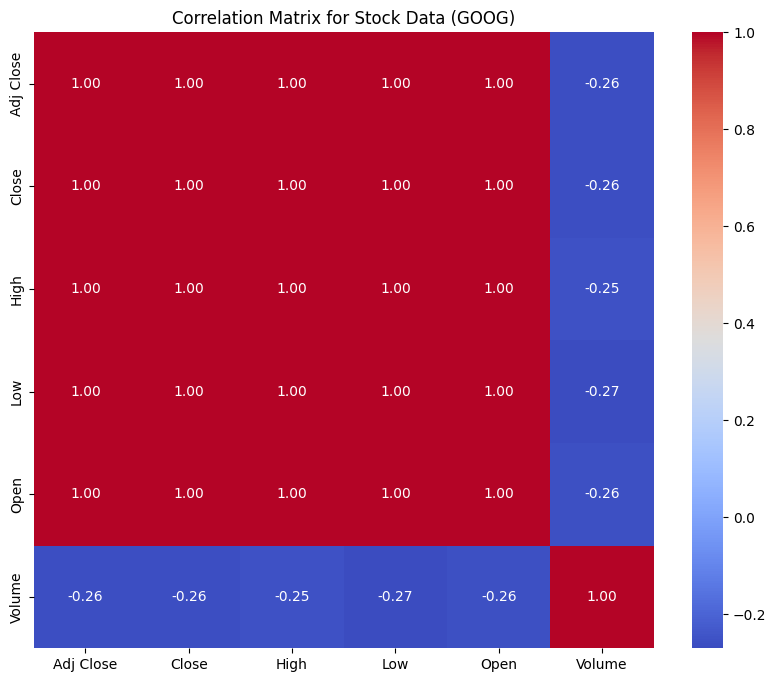

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical columns in df_treated
correlation_matrix = df_treated.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix for Stock Data ({stock})')
plt.show()

In [ ]:
print("Checking for non-numerical columns in df_treated:")
non_numerical_cols = df_treated.select_dtypes(include=['object', 'category', 'bool']).columns

if len(non_numerical_cols) == 0:
    print("All columns in df_treated are numerical. No encoding is needed.")
else:
    print(f"The following non-numerical columns were found: {list(non_numerical_cols)}")
    print("Consider using techniques like One-Hot Encoding or Label Encoding if these are categorical features.")

Checking for non-numerical columns in df_treated:
All columns in df_treated are numerical. No encoding is needed.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
numerical_cols = df_treated.select_dtypes(include=['float64', 'int64']).columns
df_normalized = df_treated.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_treated[numerical_cols])
print("DataFrame after Min-Max Normalization:")
print(df_normalized.head())

DataFrame after Min-Max Normalization:
            Adj Close     Close      High       Low      Open    Volume
Date                                                                   
2021-02-04   0.117865  0.119080  0.105884  0.115186  0.109510  0.825771
2021-02-05   0.128563  0.129888  0.113183  0.120347  0.109849  0.656277
2021-02-08   0.127034  0.128344  0.119592  0.124253  0.120812  0.499607
2021-02-09   0.124212  0.125492  0.113981  0.126270  0.112456  0.311518
2021-02-10   0.127776  0.129093  0.114968  0.121506  0.117240  0.442753


In [ ]:
import tensorflow as tf

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, backcast_length, forecast_length, n_hidden_layers, hidden_layer_units, **kwargs):
        super().__init__(**kwargs)
        self.backcast_length = backcast_length
        self.forecast_length = forecast_length

        # Dense layers for generic feature extraction (hidden stack)
        self.hidden_stack = []
        for _ in range(n_hidden_layers):
            self.hidden_stack.append(tf.keras.layers.Dense(hidden_layer_units, activation='relu'))

        # Basis expansion layers for backcasting
        self.backcast_layer = tf.keras.layers.Dense(backcast_length, activation='linear')

        # Basis expansion layers for forecasting
        self.forecast_layer = tf.keras.layers.Dense(forecast_length, activation='linear')

    def call(self, inputs):
        # Pass input through hidden stack
        x = inputs
        for layer in self.hidden_stack:
            x = layer(x)

        # Compute backcast and forecast components
        backcast = self.backcast_layer(x)
        forecast = self.forecast_layer(x)

        return backcast, forecast

print("NBeatsBlock class defined successfully.")

NBeatsBlock class defined successfully.


In [ ]:
import tensorflow as tf

class TrendBlock(NBeatsBlock):
    def __init__(self, backcast_length, forecast_length, n_hidden_layers, hidden_layer_units, **kwargs):
        super().__init__(backcast_length, forecast_length, n_hidden_layers, hidden_layer_units, **kwargs)

        # TrendBlock specifically uses dense layers for basis expansion that are linear
        self.backcast_layer = tf.keras.layers.Dense(backcast_length, activation='linear')
        self.forecast_layer = tf.keras.layers.Dense(forecast_length, activation='linear')

    # The call method can be inherited directly from NBeatsBlock

print("TrendBlock class defined successfully.")

TrendBlock class defined successfully.


In [ ]:
import tensorflow as tf

class SeasonalityBlock(NBeatsBlock):
    def __init__(self, backcast_length, forecast_length, n_hidden_layers, hidden_layer_units, **kwargs):
        super().__init__(backcast_length, forecast_length, n_hidden_layers, hidden_layer_units, **kwargs)

        # SeasonalityBlock also uses dense layers for basis expansion, often linear for simplicity
        # In a more advanced implementation, these might be Fourier series or other seasonal basis functions.
        self.backcast_layer = tf.keras.layers.Dense(backcast_length, activation='linear')
        self.forecast_layer = tf.keras.layers.Dense(forecast_length, activation='linear')

    # The call method can be inherited directly from NBeatsBlock

print("SeasonalityBlock class defined successfully.")

SeasonalityBlock class defined successfully.


**FULL N-BEATS MODEL ASSEMBLY**

In [ ]:
import tensorflow as tf

class NBeatsModel(tf.keras.Model):
    def __init__(self, backcast_length, forecast_length, share_weights, n_stacks, n_blocks_per_stack, n_hidden_layers, hidden_layer_units, **kwargs):
        super().__init__(**kwargs)
        self.backcast_length = backcast_length
        self.forecast_length = forecast_length
        self.share_weights = share_weights
        self.n_stacks = n_stacks
        self.n_blocks_per_stack = n_blocks_per_stack
        self.n_hidden_layers = n_hidden_layers
        self.hidden_layer_units = hidden_layer_units

        self.stacks = []
        for i in range(n_stacks):
            stack_blocks = []
            for j in range(n_blocks_per_stack):
                # Alternate between TrendBlock and SeasonalityBlock
                if j % 2 == 0:
                    block_type = TrendBlock
                else:
                    block_type = SeasonalityBlock

                if share_weights and i > 0: # Reuse blocks from the first stack if share_weights is True
                    # This simplified sharing assumes a consistent block type order across stacks
                    # A more robust implementation might store blocks by type and index.
                    block = self.stacks[0][j]
                else:
                    block = block_type(backcast_length, forecast_length, n_hidden_layers, hidden_layer_units)
                stack_blocks.append(block)
            self.stacks.append(stack_blocks)

    def call(self, inputs):
        # Initialize residuals with the input (historical time series)
        residuals = inputs
        # Initialize forecast as a tensor of zeros with the correct forecast shape
        forecast = tf.zeros((tf.shape(inputs)[0], self.forecast_length), dtype=inputs.dtype)

        for stack in self.stacks:
            for block in stack:
                block_backcast, block_forecast = block(residuals)

                # Residual connection: subtract backcast component from residuals
                residuals = residuals - block_backcast

                # Accumulate forecast component
                forecast = forecast + block_forecast

        return forecast

print("NBeatsModel class defined successfully.")


NBeatsModel class defined successfully.


**PREPARE N-BEATS TIME SERIES DATA FOR TRAINING**

In [ ]:
import numpy as np

def create_sequences(data, backcast_length, forecast_length):
    X, y = [], []
    for i in range(len(data) - backcast_length - forecast_length + 1):
        # Backcast sequence (input)
        backcast_sequence = data[i:(i + backcast_length)]
        X.append(backcast_sequence)

        # Forecast sequence (output)
        forecast_sequence = data[(i + backcast_length):(i + backcast_length + forecast_length)]
        y.append(forecast_sequence)

    return np.array(X), np.array(y)

# Define backcast and forecast lengths
backcast_window = 60 # e.g., 60 days of historical data
forecast_window = 30 # e.g., 30 days to forecast

# Apply the function to the 'Close' price column of df_normalized
# Ensure the 'Close' column is treated as a 1D array for sequence creation
close_data = df_normalized['Close'].values

X_train, y_train = create_sequences(close_data, backcast_window, forecast_window)

print(f"Shape of backcast (X_train) sequences: {X_train.shape}")
print(f"Shape of forecast (y_train) sequences: {y_train.shape}")

Shape of backcast (X_train) sequences: (1166, 60)
Shape of forecast (y_train) sequences: (1166, 30)


**TRAIN THE N- BEATS MODEL**

# Task
```python
# Instantiate the NBeatsModel
# Using values for parameters that are commonly found in N-Beats implementations
# You can adjust these parameters based on your data and computational resources
nbeats_model = NBeatsModel(
    backcast_length=backcast_window,
    forecast_length=forecast_window,
    share_weights=False,  # Set to True to share weights across stacks
    n_stacks=3,           # Number of N-Beats stacks
    n_blocks_per_stack=3, # Number of blocks within each stack
    n_hidden_layers=4,    # Number of hidden dense layers in each block
    hidden_layer_units=256 # Number of units in each hidden dense layer
)

# Compile the model
# Using Adam optimizer and Mean Squared Error loss, which are common for regression tasks
nbeats_model.compile(optimizer='Adam', loss='mse')

# Train the model
# Using a small number of epochs for demonstration. Increase for better performance.
# You might also want to add validation data and callbacks for early stopping.
history = nbeats_model.fit(
    X_train,
    y_train,
    epochs=10,  # Number of training epochs
    batch_size=32, # Batch size for training
    verbose=1    # Set to 0 for silent, 1 for progress bar, 2 for one line per epoch
)

print("\nN-Beats model training complete.")
```

In [ ]:
import tensorflow as tf

# Instantiate the NBeatsModel
# Using values for parameters that are commonly found in N-Beats implementations
# You can adjust these parameters based on your data and computational resources
nbeats_model = NBeatsModel(
    backcast_length=backcast_window,
    forecast_length=forecast_window,
    share_weights=False,  # Set to True to share weights across stacks
    n_stacks=3,           # Number of N-Beats stacks
    n_blocks_per_stack=3, # Number of blocks within each stack
    n_hidden_layers=4,    # Number of hidden dense layers in each block
    hidden_layer_units=256 # Number of units in each hidden dense layer
)

# Compile the model
# Using Adam optimizer and Mean Squared Error loss, which are common for regression tasks
nbeats_model.compile(optimizer='Adam', loss='mse')

# Train the model
# Using a small number of epochs for demonstration. Increase for better performance.
# You might also want to add validation data and callbacks for early stopping.
history = nbeats_model.fit(
    X_train,
    y_train,
    epochs=10,  # Number of training epochs
    batch_size=32, # Batch size for training
    verbose=1    # Set to 0 for silent, 1 for progress bar, 2 for one line per epoch
)

print("\nN-Beats model training complete.")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_7', however the lay

37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.0548
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0043
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0036
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0034
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0034
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0037
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0033
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0037
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0042

N-Beats model training complete.


In [ ]:
import numpy as np

def walk_forward_split(X, y, train_window_size, test_window_size):
    # The total length of the sequence considered for splitting is the number of samples in X
    total_samples = X.shape[0]

    # Iterate through the data to create splits
    # The last possible training start index is when there's just enough data for a full train and test window
    for i in range(total_samples - train_window_size - test_window_size + 1):
        # Training set consists of `train_window_size` consecutive samples
        X_train_fold = X[i : i + train_window_size]
        y_train_fold = y[i : i + train_window_size]

        # Testing set immediately follows the training set and is `test_window_size` long
        X_test_fold = X[i + train_window_size : i + train_window_size + test_window_size]
        y_test_fold = y[i + train_window_size : i + train_window_size + test_window_size]

        yield X_train_fold, y_train_fold, X_test_fold, y_test_fold

# Define the sizes for walk-forward validation
# For simplicity, let's use a train window that's significantly larger than the forecast window,
# and the test window will be equal to our forecast_window.

train_window_validation_size = 1000 # Example: Use 1000 samples for training
test_window_validation_size = forecast_window # Our forecast horizon is the test window size

print(f"Using a training window of {train_window_validation_size} samples and a testing window of {test_window_validation_size} samples (equal to forecast_window).")

# Example of how to iterate through the splits (not used for model training yet, just demonstrating)
# This will generate (total_samples - train_window_size - test_window_size + 1) number of splits

# Commenting out the iteration for now to avoid verbose output during generation,
# but this is how you would use the generator:

# for fold_num, (X_tr, y_tr, X_val, y_val) in enumerate(walk_forward_split(X_train, y_train, train_window_validation_size, test_window_validation_size)):
#     print(f"Fold {fold_num + 1}: X_train shape {X_tr.shape}, y_train shape {y_tr.shape}, X_val shape {X_val.shape}, y_val shape {y_val.shape}")

print("Walk-forward split function defined. The actual iteration will be performed during model evaluation.")


Using a training window of 1000 samples and a testing window of 30 samples (equal to forecast_window).
Walk-forward split function defined. The actual iteration will be performed during model evaluation.


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Re-use model parameters from previous training
n_stacks = 3
n_blocks_per_stack = 3
n_hidden_layers = 4
hidden_layer_units = 256
share_weights = False

# Lists to store predictions and actual values across all folds
all_predictions = []
all_actuals = []

# Define how many folds to run for evaluation.
# For full evaluation, this should be 'None' or calculated from your data (e.g., total_samples - train_window_validation_size - test_window_validation_size + 1)
# We'll limit it to 5 folds for a quicker demonstration.
num_folds_to_run = 5

print(f"Starting walk-forward validation for {num_folds_to_run} folds...")

fold_count = 0
for X_tr_fold, y_tr_fold, X_val_fold, y_val_fold in walk_forward_split(X_train, y_train, train_window_validation_size, test_window_validation_size):
    if fold_count >= num_folds_to_run:
        break

    print(f"\n--- Running Fold {fold_count + 1} ---")

    # Instantiate a fresh model for each fold to simulate retraining and avoid information leakage
    fold_nbeats_model = NBeatsModel(
        backcast_length=backcast_window,
        forecast_length=forecast_window,
        share_weights=share_weights,
        n_stacks=n_stacks,
        n_blocks_per_stack=n_blocks_per_stack,
        n_hidden_layers=n_hidden_layers,
        hidden_layer_units=hidden_layer_units
    )

    # Compile the model for the current fold
    fold_nbeats_model.compile(optimizer='Adam', loss='mse')

    # Train the model on the current training fold
    print(f"Training model for Fold {fold_count + 1}...")
    fold_nbeats_model.fit(
        X_tr_fold,
        y_tr_fold,
        epochs=10,  # Keeping epochs low for demonstration, increase for better results
        batch_size=32,
        verbose=0 # Suppress verbose output during fold training
    )

    # Make predictions on the current validation fold (X_val_fold represents the backcast for the test period)
    print(f"Making predictions for Fold {fold_count + 1}...")
    predictions_fold = fold_nbeats_model.predict(X_val_fold, verbose=0)

    # Flatten the actuals and predictions and store them
    all_actuals.extend(y_val_fold.flatten())
    all_predictions.extend(predictions_fold.flatten())

    fold_count += 1

print("\nWalk-forward validation complete.")

# Convert lists to numpy arrays for final metric calculation
all_actuals_np = np.array(all_actuals)
all_predictions_np = np.array(all_predictions)

# --- Denormalize the predictions and actuals ---
# We need the scaler used for df_normalized and the index of the 'Close' column
# The `scaler` object was fitted on `df_treated[numerical_cols]`
# `numerical_cols` is a list of column names, and we need the index of 'Close'

numerical_cols_list = list(df_treated.select_dtypes(include=['float64', 'int64']).columns)
close_col_idx = numerical_cols_list.index('Close')

# Create dummy arrays of the shape used during normalization for inverse_transform
dummy_shape_predictions = (all_predictions_np.shape[0], len(numerical_cols_list))
dummy_shape_actuals = (all_actuals_np.shape[0], len(numerical_cols_list))

dummy_predictions_data = np.zeros(dummy_shape_predictions)
dummy_actuals_data = np.zeros(dummy_shape_actuals)

dummy_predictions_data[:, close_col_idx] = all_predictions_np
dummy_actuals_data[:, close_col_idx] = all_actuals_np

# Perform inverse transform
all_predictions_denormalized = scaler.inverse_transform(dummy_predictions_data)[:, close_col_idx]
all_actuals_denormalized = scaler.inverse_transform(dummy_actuals_data)[:, close_col_idx]

# --- Calculate Evaluation Metrics on Denormalized Data ---
mse = mean_squared_error(all_actuals_denormalized, all_predictions_denormalized)
rmse = np.sqrt(mse)
mae = mean_absolute_error(all_actuals_denormalized, all_predictions_denormalized)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values from y_true to avoid division by zero
    non_zero_indices = y_true != 0
    if non_zero_indices.sum() == 0: # Handle case where all true values are zero
        return np.inf if np.any(y_pred != 0) else 0.0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape = mean_absolute_percentage_error(all_actuals_denormalized, all_predictions_denormalized)

print("\n--- Model Evaluation Results (Denormalized Data) ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print("\nModel evaluation complete.")


Starting walk-forward validation for 5 folds...

--- Running Fold 1 ---
Training model for Fold 1...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_12', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_13', however the l

Making predictions for Fold 1...

--- Running Fold 2 ---
Training model for Fold 2...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_18', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_19', however the l

Making predictions for Fold 2...

--- Running Fold 3 ---
Training model for Fold 3...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_24', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_12', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_25', however the 

Making predictions for Fold 3...

--- Running Fold 4 ---
Training model for Fold 4...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_30', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_15', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_31', however the 

Making predictions for Fold 4...

--- Running Fold 5 ---
Training model for Fold 5...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_36', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_18', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_37', however the 

Making predictions for Fold 5...



Walk-forward validation complete.

--- Model Evaluation Results (Denormalized Data) ---
Mean Squared Error (MSE): 54.6325
Root Mean Squared Error (RMSE): 7.3914
Mean Absolute Error (MAE): 6.0356
Mean Absolute Percentage Error (MAPE): 3.50%

Model evaluation complete.


In [ ]:
param_grid = {
    'n_stacks': [1, 2, 3],
    'n_blocks_per_stack': [1, 2, 3],
    'n_hidden_layers': [2, 3, 4],
    'hidden_layer_units': [128, 256, 512],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

print("Hyperparameter search space (param_grid) defined successfully:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

Hyperparameter search space (param_grid) defined successfully:
  n_stacks: [1, 2, 3]
  n_blocks_per_stack: [1, 2, 3]
  n_hidden_layers: [2, 3, 4]
  hidden_layer_units: [128, 256, 512]
  epochs: [10, 20]
  batch_size: [32, 64]


In [ ]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize variables to store the best model's hyperparameters and performance
best_rmse = float('inf')
best_params = None

# Get all keys and values from param_grid
keys = list(param_grid.keys())
values = list(param_grid.values())

print("Starting hyperparameter tuning with walk-forward validation...")

# Iterate through all possible combinations of hyperparameters
for combination in itertools.product(*values):
    current_params = dict(zip(keys, combination))

    n_stacks = current_params['n_stacks']
    n_blocks_per_stack = current_params['n_blocks_per_stack']
    n_hidden_layers = current_params['n_hidden_layers']
    hidden_layer_units = current_params['hidden_layer_units']
    epochs = current_params['epochs']
    batch_size = current_params['batch_size']

    print(f"\n--- Testing Hyperparameters: {current_params} ---")

    # Lists to store predictions and actual values for the current parameter set
    all_predictions_current_hp = []
    all_actuals_current_hp = []

    fold_count = 0
    # Limit the number of folds to run for tuning to save computational time
    # For a full search, this limit should be removed or set higher
    num_folds_for_tuning = 3 # For demonstration, run fewer folds per HP combination

    for X_tr_fold, y_tr_fold, X_val_fold, y_val_fold in walk_forward_split(X_train, y_train, train_window_validation_size, test_window_validation_size):
        if fold_count >= num_folds_for_tuning:
            break

        # Instantiate a fresh model for each fold and each hyperparameter combination
        fold_nbeats_model = NBeatsModel(
            backcast_length=backcast_window,
            forecast_length=forecast_window,
            share_weights=False, # Keeping share_weights as False for now
            n_stacks=n_stacks,
            n_blocks_per_stack=n_blocks_per_stack,
            n_hidden_layers=n_hidden_layers,
            hidden_layer_units=hidden_layer_units
        )

        # Compile the model for the current fold and HP combination
        fold_nbeats_model.compile(optimizer='Adam', loss='mse')

        # Train the model on the current training fold
        # print(f"  Training model for Fold {fold_count + 1} with current HP...")
        fold_nbeats_model.fit(
            X_tr_fold,
            y_tr_fold,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0 # Suppress verbose output during fold training
        )

        # Make predictions on the current validation fold
        predictions_fold = fold_nbeats_model.predict(X_val_fold, verbose=0)

        # Extend lists with flattened predictions and actuals
        all_actuals_current_hp.extend(y_val_fold.flatten())
        all_predictions_current_hp.extend(predictions_fold.flatten())

        fold_count += 1

    # Convert lists to numpy arrays for current HP combination
    all_actuals_np_current_hp = np.array(all_actuals_current_hp)
    all_predictions_np_current_hp = np.array(all_predictions_current_hp)

    # Denormalize the predictions and actuals
    dummy_predictions_data_current_hp = np.zeros((all_predictions_np_current_hp.shape[0], len(numerical_cols_list)))
    dummy_actuals_data_current_hp = np.zeros((all_actuals_np_current_hp.shape[0], len(numerical_cols_list)))

    dummy_predictions_data_current_hp[:, close_col_idx] = all_predictions_np_current_hp
    dummy_actuals_data_current_hp[:, close_col_idx] = all_actuals_np_current_hp

    all_predictions_denormalized_current_hp = scaler.inverse_transform(dummy_predictions_data_current_hp)[:, close_col_idx]
    all_actuals_denormalized_current_hp = scaler.inverse_transform(dummy_actuals_data_current_hp)[:, close_col_idx]

    # Calculate Evaluation Metrics on Denormalized Data for current HP combination
    mse_current_hp = mean_squared_error(all_actuals_denormalized_current_hp, all_predictions_denormalized_current_hp)
    rmse_current_hp = np.sqrt(mse_current_hp)
    mae_current_hp = mean_absolute_error(all_actuals_denormalized_current_hp, all_predictions_denormalized_current_hp)
    mape_current_hp = mean_absolute_percentage_error(all_actuals_denormalized_current_hp, all_predictions_denormalized_current_hp)

    print(f"  Metrics for {current_params}:")
    print(f"    MSE: {mse_current_hp:.4f}")
    print(f"    RMSE: {rmse_current_hp:.4f}")
    print(f"    MAE: {mae_current_hp:.4f}")
    print(f"    MAPE: {mape_current_hp:.2f}%")

    # Keep track of the best performing hyperparameters
    if rmse_current_hp < best_rmse:
        best_rmse = rmse_current_hp
        best_params = current_params

print("\nHyperparameter tuning complete.")
print(f"Best RMSE found: {best_rmse:.4f}")
print(f"Best Hyperparameters: {best_params}")

Starting hyperparameter tuning with walk-forward validation...

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_42', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_7/trend_block_42/dense_508/kernel', 'n_beats_model_7/trend_block_42/dense_508/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_43', however the layer does not have a `build()` method implemented and it looks like it has unbu

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 170.6189
    RMSE: 13.0621
    MAE: 11.6606
    MAPE: 6.70%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_45', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_10/trend_block_45/dense_526/kernel', 'n_beats_model_10/trend_block_45/dense_526/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_46', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 149.2488
    RMSE: 12.2167
    MAE: 10.8315
    MAPE: 6.23%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_48', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_13/trend_block_48/dense_544/kernel', 'n_beats_model_13/trend_block_48/dense_544/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_49', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 38.6838
    RMSE: 6.2196
    MAE: 5.1136
    MAPE: 2.96%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_51', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_16/trend_block_51/dense_562/kernel', 'n_beats_model_16/trend_block_51/dense_562/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_52', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 69.0844
    RMSE: 8.3117
    MAE: 6.9721
    MAPE: 4.01%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_54', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_19/trend_block_54/dense_580/kernel', 'n_beats_model_19/trend_block_54/dense_580/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_55', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 45.6985
    RMSE: 6.7601
    MAE: 5.5577
    MAPE: 3.21%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_57', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_22/trend_block_57/dense_598/kernel', 'n_beats_model_22/trend_block_57/dense_598/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_58', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 88.8328
    RMSE: 9.4251
    MAE: 8.1756
    MAPE: 4.70%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_60', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_25/trend_block_60/dense_616/kernel', 'n_beats_model_25/trend_block_60/dense_616/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_61', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 39.5535
    RMSE: 6.2892
    MAE: 5.0708
    MAPE: 2.96%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_63', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_28/trend_block_63/dense_634/kernel', 'n_beats_model_28/trend_block_63/dense_634/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_64', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 77.8045
    RMSE: 8.8207
    MAE: 7.6052
    MAPE: 4.37%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_66', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_31/trend_block_66/dense_652/kernel', 'n_beats_model_31/trend_block_66/dense_652/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_67', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 97.0697
    RMSE: 9.8524
    MAE: 8.2405
    MAPE: 4.75%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_69', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_34/trend_block_69/dense_670/kernel', 'n_beats_model_34/trend_block_69/dense_670/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_70', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 139.0327
    RMSE: 11.7912
    MAE: 10.1271
    MAPE: 5.82%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_72', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_37/trend_block_72/dense_688/kernel', 'n_beats_model_37/trend_block_72/dense_688/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_73', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 64.5960
    RMSE: 8.0372
    MAE: 6.5698
    MAPE: 3.80%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_75', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_40/trend_block_75/dense_706/kernel', 'n_beats_model_40/trend_block_75/dense_706/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_76', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 33.2743
    RMSE: 5.7684
    MAE: 4.6771
    MAPE: 2.72%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_78', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_43/trend_block_78/dense_725/kernel', 'n_beats_model_43/trend_block_78/dense_725/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_79', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 68.3555
    RMSE: 8.2677
    MAE: 7.0257
    MAPE: 4.04%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_81', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_46/trend_block_81/dense_746/kernel', 'n_beats_model_46/trend_block_81/dense_746/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_82', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 164.0982
    RMSE: 12.8101
    MAE: 11.2873
    MAPE: 6.49%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_84', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_49/trend_block_84/dense_767/kernel', 'n_beats_model_49/trend_block_84/dense_767/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_85', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 42.8757
    RMSE: 6.5480
    MAE: 5.2971
    MAPE: 3.07%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_87', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_52/trend_block_87/dense_788/kernel', 'n_beats_model_52/trend_block_87/dense_788/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_88', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 54.6928
    RMSE: 7.3955
    MAE: 6.1824
    MAPE: 3.57%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_90', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_55/trend_block_90/dense_809/kernel', 'n_beats_model_55/trend_block_90/dense_809/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_91', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 83.5420
    RMSE: 9.1401
    MAE: 7.7492
    MAPE: 4.47%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_93', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_58/trend_block_93/dense_830/kernel', 'n_beats_model_58/trend_block_93/dense_830/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_94', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 48.8761
    RMSE: 6.9911
    MAE: 5.7628
    MAPE: 3.33%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_96', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_61/trend_block_96/dense_851/kernel', 'n_beats_model_61/trend_block_96/dense_851/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_97', however the layer does not have a `build()` method implemented and it looks like it has un

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 58.2525
    RMSE: 7.6323
    MAE: 6.1546
    MAPE: 3.56%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_99', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_64/trend_block_99/dense_872/kernel', 'n_beats_model_64/trend_block_99/dense_872/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_100', however the layer does not have a `build()` method implemented and it looks like it has u

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 53.8711
    RMSE: 7.3397
    MAE: 5.9169
    MAPE: 3.42%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_102', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_67/trend_block_102/dense_893/kernel', 'n_beats_model_67/trend_block_102/dense_893/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_103', however the layer does not have a `build()` method implemented and it looks like it ha

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 49.9841
    RMSE: 7.0699
    MAE: 5.8324
    MAPE: 3.37%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_105', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_70/trend_block_105/dense_914/kernel', 'n_beats_model_70/trend_block_105/dense_914/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_106', however the layer does not have a `build()` method implemented and it looks like it ha

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 58.7003
    RMSE: 7.6616
    MAE: 6.4358
    MAPE: 3.71%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_108', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_73/trend_block_108/dense_935/kernel', 'n_beats_model_73/trend_block_108/dense_935/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_109', however the layer does not have a `build()` method implemented and it looks like it ha

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 43.7636
    RMSE: 6.6154
    MAE: 5.6205
    MAPE: 3.24%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_111', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_76/trend_block_111/dense_956/kernel', 'n_beats_model_76/trend_block_111/dense_956/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_112', however the layer does not have a `build()` method implemented and it looks like it ha

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 31.3664
    RMSE: 5.6006
    MAE: 4.5931
    MAPE: 2.67%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_114', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_79/trend_block_114/dense_978/kernel', 'n_beats_model_79/trend_block_114/dense_978/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_115', however the layer does not have a `build()` method implemented and it looks like it ha

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 58.2273
    RMSE: 7.6307
    MAE: 6.2964
    MAPE: 3.63%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_117', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_82/trend_block_117/dense_1002/kernel', 'n_beats_model_82/trend_block_117/dense_1002/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_118', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 69.4538
    RMSE: 8.3339
    MAE: 7.0399
    MAPE: 4.05%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_120', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_85/trend_block_120/dense_1026/kernel', 'n_beats_model_85/trend_block_120/dense_1026/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_121', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 50.6617
    RMSE: 7.1177
    MAE: 5.9081
    MAPE: 3.43%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_123', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_88/trend_block_123/dense_1050/kernel', 'n_beats_model_88/trend_block_123/dense_1050/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_124', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 89.0946
    RMSE: 9.4390
    MAE: 7.9107
    MAPE: 4.55%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_126', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_91/trend_block_126/dense_1074/kernel', 'n_beats_model_91/trend_block_126/dense_1074/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_127', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 75.8132
    RMSE: 8.7071
    MAE: 7.2279
    MAPE: 4.17%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_129', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_94/trend_block_129/dense_1098/kernel', 'n_beats_model_94/trend_block_129/dense_1098/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_130', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 58.9190
    RMSE: 7.6759
    MAE: 6.4118
    MAPE: 3.69%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_132', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_97/trend_block_132/dense_1122/kernel', 'n_beats_model_97/trend_block_132/dense_1122/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_133', however the layer does not have a `build()` method implemented and it looks like it 

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 45.4349
    RMSE: 6.7405
    MAE: 5.5076
    MAPE: 3.19%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_135', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_100/trend_block_135/dense_1146/kernel', 'n_beats_model_100/trend_block_135/dense_1146/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_136', however the layer does not have a `build()` method implemented and it looks like i

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 59.7977
    RMSE: 7.7329
    MAE: 6.4149
    MAPE: 3.73%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_138', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_103/trend_block_138/dense_1170/kernel', 'n_beats_model_103/trend_block_138/dense_1170/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_139', however the layer does not have a `build()` method implemented and it looks like i

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 66.3301
    RMSE: 8.1443
    MAE: 6.2584
    MAPE: 3.63%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_141', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_106/trend_block_141/dense_1194/kernel', 'n_beats_model_106/trend_block_141/dense_1194/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_142', however the layer does not have a `build()` method implemented and it looks like i

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 37.7319
    RMSE: 6.1426
    MAE: 5.0204
    MAPE: 2.90%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_144', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_109/trend_block_144/dense_1218/kernel', 'n_beats_model_109/trend_block_144/dense_1218/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_145', however the layer does not have a `build()` method implemented and it looks like i

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 50.5381
    RMSE: 7.1090
    MAE: 5.8031
    MAPE: 3.36%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_147', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats_model_112/trend_block_147/dense_1242/kernel', 'n_beats_model_112/trend_block_147/dense_1242/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_148', however the layer does not have a `build()` method implemented and it looks like i

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 1, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 34.4042
    RMSE: 5.8655
    MAE: 4.7331
    MAPE: 2.75%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_150', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_21', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 83.4282
    RMSE: 9.1339
    MAE: 7.5814
    MAPE: 4.37%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_153', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_24', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 79.8836
    RMSE: 8.9378
    MAE: 7.5075
    MAPE: 4.32%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_156', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_27', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 49.7116
    RMSE: 7.0506
    MAE: 5.7038
    MAPE: 3.31%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_159', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_30', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 87.2093
    RMSE: 9.3386
    MAE: 7.8365
    MAPE: 4.53%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_162', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_33', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 36.3233
    RMSE: 6.0269
    MAE: 4.8639
    MAPE: 2.83%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_165', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_36', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 66.7619
    RMSE: 8.1708
    MAE: 7.0090
    MAPE: 4.04%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_168', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_39', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 39.8166
    RMSE: 6.3100
    MAE: 5.1228
    MAPE: 2.98%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_171', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_42', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 31.3979
    RMSE: 5.6034
    MAE: 4.5749
    MAPE: 2.66%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_174', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_45', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 47.6553
    RMSE: 6.9033
    MAE: 5.7761
    MAPE: 3.34%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_177', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_48', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 58.2951
    RMSE: 7.6351
    MAE: 6.4567
    MAPE: 3.72%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_180', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_51', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 60.2483
    RMSE: 7.7620
    MAE: 6.4304
    MAPE: 3.72%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_183', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_54', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 36.6489
    RMSE: 6.0538
    MAE: 4.9341
    MAPE: 2.88%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_186', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_57', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 63.7287
    RMSE: 7.9830
    MAE: 6.4710
    MAPE: 3.74%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_189', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_60', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 45.1037
    RMSE: 6.7159
    MAE: 5.4255
    MAPE: 3.16%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_192', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_63', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 91.3763
    RMSE: 9.5591
    MAE: 7.9906
    MAPE: 4.60%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_195', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_66', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 37.9896
    RMSE: 6.1636
    MAE: 4.9808
    MAPE: 2.89%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_198', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_69', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 35.8060
    RMSE: 5.9838
    MAE: 4.9252
    MAPE: 2.85%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_201', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_72', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 45.7302
    RMSE: 6.7624
    MAE: 5.6336
    MAPE: 3.26%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_204', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_75', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 66.2107
    RMSE: 8.1370
    MAE: 6.7072
    MAPE: 3.91%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_207', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_78', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 42.6578
    RMSE: 6.5313
    MAE: 5.1693
    MAPE: 3.02%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_210', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_81', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 37.1969
    RMSE: 6.0989
    MAE: 5.0245
    MAPE: 2.91%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_213', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_84', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 91.9489
    RMSE: 9.5890
    MAE: 8.0890
    MAPE: 4.66%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_216', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_87', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 52.1239
    RMSE: 7.2197
    MAE: 5.9515
    MAPE: 3.46%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_219', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_90', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 3, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 30.5027
    RMSE: 5.5229
    MAE: 4.4964
    MAPE: 2.62%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_222', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_93', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 42.8770
    RMSE: 6.5481
    MAE: 5.3252
    MAPE: 3.09%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_225', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_96', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 75.0986
    RMSE: 8.6659
    MAE: 7.4568
    MAPE: 4.29%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_228', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_99', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beats

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 34.4345
    RMSE: 5.8681
    MAE: 4.7876
    MAPE: 2.78%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_231', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_102', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 37.5888
    RMSE: 6.1310
    MAE: 4.8844
    MAPE: 2.84%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_234', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_105', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 48.6381
    RMSE: 6.9741
    MAE: 5.8630
    MAPE: 3.38%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_237', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_108', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 78.2478
    RMSE: 8.8458
    MAE: 7.4943
    MAPE: 4.31%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_240', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_111', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 34.3560
    RMSE: 5.8614
    MAE: 4.6805
    MAPE: 2.73%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_243', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_114', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 38.5388
    RMSE: 6.2080
    MAE: 4.9868
    MAPE: 2.89%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_246', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_117', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 66.1353
    RMSE: 8.1324
    MAE: 6.5378
    MAPE: 3.77%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_249', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_120', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 74.7510
    RMSE: 8.6459
    MAE: 7.4307
    MAPE: 4.27%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_252', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_123', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 33.4472
    RMSE: 5.7834
    MAE: 4.7858
    MAPE: 2.78%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_255', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_126', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['n_beat

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 2, 'n_hidden_layers': 4, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 35.2641
    RMSE: 5.9384
    MAE: 4.7730
    MAPE: 2.78%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_258', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_129', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_259', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 81.5469
    RMSE: 9.0303
    MAE: 7.5034
    MAPE: 4.32%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_264', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_132', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_265', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 67.5272
    RMSE: 8.2175
    MAE: 6.8538
    MAPE: 3.95%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_270', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_135', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_271', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32}:
    MSE: 57.8697
    RMSE: 7.6072
    MAE: 6.1608
    MAPE: 3.57%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_276', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_138', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_277', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 64}:
    MSE: 54.5435
    RMSE: 7.3854
    MAE: 6.0953
    MAPE: 3.52%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_282', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_141', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_283', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 32}:
    MSE: 41.8117
    RMSE: 6.4662
    MAE: 5.2108
    MAPE: 3.04%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_288', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_144', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_289', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 10, 'batch_size': 64}:
    MSE: 66.8041
    RMSE: 8.1734
    MAE: 6.7085
    MAPE: 3.87%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_294', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_147', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_295', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 32}:
    MSE: 42.2765
    RMSE: 6.5020
    MAE: 5.2976
    MAPE: 3.08%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_300', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_150', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_301', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 256, 'epochs': 20, 'batch_size': 64}:
    MSE: 37.5883
    RMSE: 6.1309
    MAE: 4.9737
    MAPE: 2.90%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_306', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_153', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_307', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 32}:
    MSE: 65.9083
    RMSE: 8.1184
    MAE: 6.8340
    MAPE: 3.95%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_312', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_156', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_313', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 10, 'batch_size': 64}:
    MSE: 55.8387
    RMSE: 7.4725
    MAE: 5.9732
    MAPE: 3.46%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_318', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_159', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_319', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 32}:
    MSE: 47.6397
    RMSE: 6.9022
    MAE: 5.5987
    MAPE: 3.26%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_324', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_162', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_325', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 2, 'hidden_layer_units': 512, 'epochs': 20, 'batch_size': 64}:
    MSE: 57.3601
    RMSE: 7.5736
    MAE: 6.0722
    MAPE: 3.53%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_330', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_165', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_331', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 32}:
    MSE: 90.2151
    RMSE: 9.4982
    MAE: 8.1105
    MAPE: 4.66%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_336', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_168', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_337', however t

  Metrics for {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 10, 'batch_size': 64}:
    MSE: 42.0391
    RMSE: 6.4838
    MAE: 5.2964
    MAPE: 3.07%

--- Testing Hyperparameters: {'n_stacks': 1, 'n_blocks_per_stack': 3, 'n_hidden_layers': 3, 'hidden_layer_units': 128, 'epochs': 20, 'batch_size': 32} ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_342', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'seasonality_block_171', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'trend_block_343', however t

KeyboardInterrupt: 